## Examen 3
<a href="https://colab.research.google.com/github/restrepo/ComputationalMethods/blob/master/exams/Examen_2020_2_03_enunciado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
1) Determine el espacio de configuraciones, en los ejes $(x,\dot{x})$, del movimiento horizontal sin fricción de una masa de $0.2\ \text{Kg}$ atada a un resorte de constante elástica $k=1\ \text{N/m}$.


2) Considere una muestra de Strontium-90, ${}^{98}_{38}\text{Sr}$, que contieme inicialmente 1000 núcleos de Strontium-90 sin decaer. En la base de datos: 

[https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/strontium.json](https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/strontium.json) 

se tienen los datos de decaimiento durante 200 años. Despues de 10 años quedan 809 nucleos sin decaer, después de 22 años quedan 564 y así sucesivamente. 

El decaimiento radiativo está determinado por la formula
$$
N(t)=N_0 \operatorname{e}^{-\lambda t}\,,\qquad \lambda=\frac{\ln(2)}{\tau}
$$
* $N(t)$ es el número de núcleos radioactivos que qedan despues de un tiempo $t$
* $N_0$ es el número inicial de las partículas presentes (es decir, $t=0$)
* $\lambda$ es la constante de decaimiento
* $\tau$ es la vida medía, es decir, el tiempo durante el cual la mitad de la muestra radioactiva ha decaído.

(a) Realice un fit a los datos y determine la vida media con su respectivo error.

(b) Grafique los datos como puntos en el plano $t$, $N(t)$ y el correspondiente al fit

Solución

1)

Al ser un movimiento horizontal sin fricciones es claro que se obtiene, por segunda Ley de Newton, la siguiente ecuación:

$$
-k\boldsymbol{x} = m\boldsymbol{a}
$$

Así:

$$ \frac{\operatorname{d}\boldsymbol{x}}{\operatorname{d}t} = \boldsymbol{v} $$
$$ \frac{\operatorname{d}\boldsymbol{v}}{\operatorname{d}t} = -\frac{k}{m}\boldsymbol{x} $$

\begin{align}
\frac{\operatorname{d}}{\operatorname{d}t} U=\begin{pmatrix}v\\
 -\dfrac{k}{m}x \end{pmatrix},
\end{align}
donde
\begin{align}
 U=\begin{pmatrix}x\\
v \end{pmatrix}.
\end{align}

In [1]:
%pylab inline
from scipy.integrate import odeint

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Definimos la función
def du_dt(U,t,k=1.,m=0.2):
    x,v = U
    dudt = [v, -k/m*x]
    return dudt

U0 = [0,0]  # Condiciones iniciales
t = np.linspace(0,30,10000) # Damos valores al parametro

# Solución del sistema
u = odeint(du_dt,U0,t) 

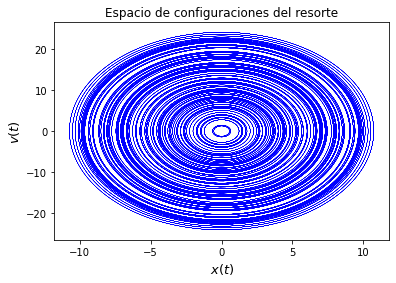

In [3]:
# Definición de condiciones iniciales aleatorias
n = 100
xi = np.random.uniform(-10,10,n)
vi = np.random.uniform(-10,10,n)

t = np.linspace(0,30,10000)

# Cálculo de x,v en las distintas condiciones iniciales
for x,v in zip(xi,vi):
    U0 = [x,v]
    u = odeint(du_dt,U0,t) # Resolvemos el problema para las condiciones iniciales aleatorias
    plt.plot(u[:,0],u[:,1],c='b',lw=0.1) # Graficamos para cada solución hallada

# Graficación
plt.title('Espacio de configuraciones del resorte')
plt.xlabel('$x(t)$',size=13)
plt.ylabel('$v(t)$',size=13)
plt.show()

2)

In [5]:
import pandas as pd
from scipy import optimize

a)

In [6]:
# Lectura de los datos
df_ = pd.read_json('https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/strontium.json')
df_

,t,N(t)
0,0,1000
1,10,809
2,22,564
3,33,480
4,40,370
5,50,285
6,60,199
7,70,169
8,80,131
9,99,101


In [7]:
# Se reescriben los datos de N para poder leer dicha columna
df = pd.DataFrame( {'t': df_.t,
                  'N': [1000, 809, 564, 480, 370, 285, 199, 169, 131, 101, 70, 54, 42, 32, 25, 21, 16, 13, 9, 7]} )

In [8]:
# Definición de la función deseada
def func(t, N0, λ):
    return N0*np.exp(-λ*t)

# Ajuste
N,ΔN = optimize.curve_fit(func, df.t, df.N)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:726: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


Nótese que $N$ es un array, cuyo segundo componente es λ, donde:

$$
\lambda=\frac{\ln(2)}{\tau}
$$
donde $\tau$ es la vida media

Así,

$$
\tau=\frac{\ln(2)}{\lambda}
$$

In [9]:
# El error viene dado por la raíz cuadrada de la matriz ΔN obtenida
σ = np.sqrt(np.diag(ΔN))

# Vida media y error
τ = np.log(2)/N[1]
Δτ = σ[1]/N[1]  # Error relativo de τ

print('La vida media es τ = {:.2f} ± {:.2f}'.format(τ,Δτ))

La vida media es τ = 27.64 ± 0.02


b)

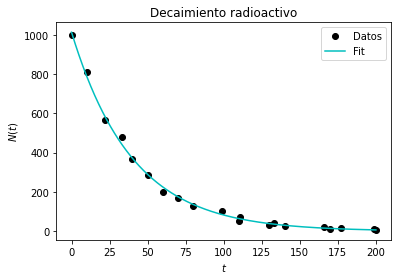

In [14]:
# Modelo
t = np.linspace(0, df.t.max(), 1000)
fit = func(t, *N)

# Graficación
plt.plot(df.t, df.N, "ko", label="Datos")
plt.plot(t, fit, "c-", label="Fit")
plt.title("Decaimiento radioactivo")
plt.legend(loc="upper right")
plt.xlabel('$t$')
plt.ylabel('$N(t)$')
plt.show()